In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline

In [2]:
sns.set(font_scale=1.2, style='ticks')

In [3]:
df = pd.read_csv('time_snapshots_population_df.csv', index_col=0)
df.head()

,time,person_id,household_id,sex,age,time_birth,time_die,birth_order,adam_eve,divorced,stay_with_parents,partner_id,father_id,mother_id,children_id,dependents_id
ind,,,,,,,,,,,,,,,,
0,199,21695,17067,1,100,36135,-1,1,False,True,False,NaN,18647.0,18358,23645;23931;24360;25077,NaN
1,199,21760,18588,1,99,36500,-1,1,False,True,False,NaN,18111.0,17674,NaN,NaN
2,199,21769,16311,1,99,36500,-1,1,False,True,False,NaN,18244.0,18069,24457;24634;24733;24834,NaN
3,199,21794,16480,1,99,36500,-1,1,False,True,False,NaN,18595.0,18769,24836;25085;25277,NaN
4,199,21861,17155,1,98,36865,-1,3,False,True,False,NaN,17436.0,16995,24263;24639;25278,NaN


In [4]:
ladies = df[df['sex']==1]

In [5]:
women = ladies[ladies['age']>=18]

In [6]:
len(women)

2996

In [7]:
child_counts = []
for i in range(len(women)):
    row = women.iloc[i]
    childs = str(row['children_id']).split(';')
    child_counts.append(len(childs))
    

In [9]:
child_counts[:10]

[4, 1, 4, 3, 3, 1, 1, 2, 1, 5]

In [10]:
sum(child_counts)/float(len(women))

1.8271028037383177

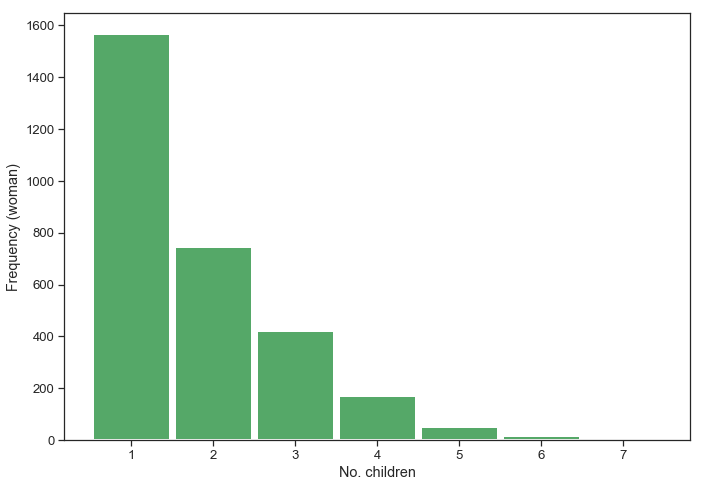

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(child_counts, kde=False, bins=range(1,9), hist_kws={"linewidth": 3, "alpha": 1, "color": "g", "rwidth":0.95, "align":'left'}, ax=ax)
ax.set_xlabel('No. children')
ax.set_ylabel('Frequency (woman)')
plt.tight_layout()
plt.savefig('child_per_woman.png', dpi=72, bbox_inches='tight', format='png')


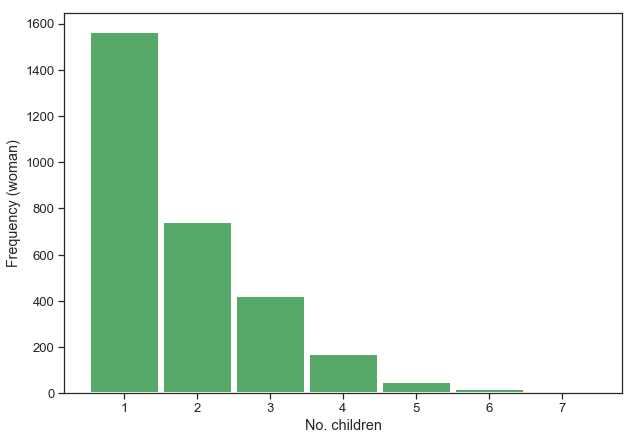

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(child_counts, kde=False, bins=range(1,9), hist_kws={"linewidth": 3, "alpha": 1, "color": "g", "rwidth":0.95, "align":'left'}, ax=ax)
ax.set_xlabel('No. children')
ax.set_ylabel('Frequency (woman)')

from io import BytesIO
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)  # rewind to beginning of file
import base64
#figdata_png = base64.b64encode(figfile.read())
figdata_png = base64.b64encode(figfile.getvalue())

In [32]:
#print('<img src="data:image/png;base64,{}"\>'.format(figdata_png.decode('utf8')))

In [10]:
men = df[df['sex']==0]
men = men[men['age']>=18]

In [11]:
men_child_counts = []
for i in range(len(women)):
    row = women.iloc[i]
    childs = str(row['children_id']).split(';')
    men_child_counts.append(len(childs))
    

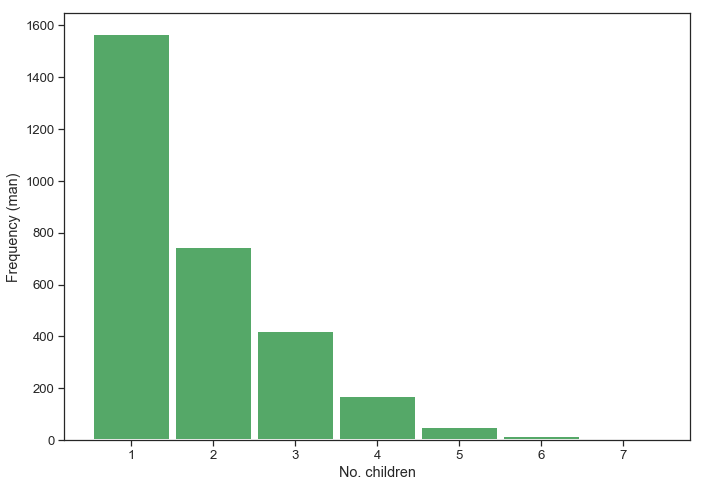

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(men_child_counts, kde=False, bins=range(1,9), hist_kws={"linewidth": 3, "alpha": 1, "color": "g", "rwidth":0.95, "align":'left'}, ax=ax)
ax.set_xlabel('No. children')
ax.set_ylabel('Frequency (man)')
plt.tight_layout()
#plt.savefig('child_per_woman.png', dpi=72, bbox_inches='tight', format='png')
